In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

(512, 512, 3)


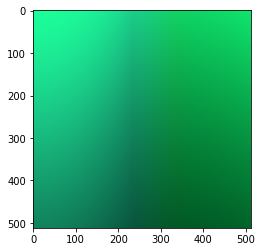

In [255]:
import numpy as np
import random
import matplotlib.pyplot as plt

class RandomImageGenerator:
    def __init__(self):
        self.functions = [(0, self.rand_color),
                 (0, self.get_x),
                 (0, self.get_y),
                 (1, np.sin),
                 (1, np.cos),
                 (2, np.add),
                 (2, np.subtract),
                 (2, np.multiply),
                 (2, self.safe_divide),
                 (1, np.abs),
                 (1, np.exp)]
        
        self.depth_min = 2
        self.depth_max = 10
        
        dx, dy = 512, 512
        self.arr_x = np.linspace(0.0, 1.0, dx).reshape((1, dx, 1))
        self.arr_y = np.linspace(0.0, 1.0, dy).reshape((dy, 1, 1))
        
        self.dx = dx
        self.dy = dy

    
    @staticmethod
    def rand_color():
        return np.array([random.random(), random.random(), random.random()]).reshape((1, 1, 3))
    
    def get_x(self): return self.arr_x
    
    def get_y(self): return self.arr_y
    
    @staticmethod
    def safe_divide(a, b):
        return np.divide(a, np.maximum(b, 0.001))

    def _generate_rec(self, depth = 0):
        funcs = [f for f in self.functions if
                    (f[0] > 0 and depth < self.depth_max) or
                    (f[0] == 0 and depth >= self.depth_min)]
        nArgs, func = random.choice(funcs)
        args = [self._generate_rec(depth + 1) for n in range(nArgs)]
        return func(*args)
    
    @staticmethod
    def _scale_val(x, out_range=(0, 1)):
        domain = np.min(x), np.max(x)
        y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
        return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2
    
    def generate(self):
        img = self._generate_rec()
        #img = img.clip(0.0, 1.0)
        base_color = np.stack([np.full([self.dy, self.dx], random.random()) for _ in range(3)], axis=2)
        img = self._scale_val(img * base_color)
        img = np.uint8(np.rint(img * 255.0))
        return img
    

gen = RandomImageGenerator()

img = gen.generate()
print(img.shape)
plt.imshow(img)